In [279]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

Could also categorise "temp" or "app_temp" <br>
30 – <br>
20 – 30 <br>
10 – 20 <br>
0 – 10 <br>
– 0 <br>

Also, do histograms of the variables: <br>
weather_sit <br>
temp <br>
app_temp <br>
humidity <br>
wind_speed <br>


Import data for the years 2011 – 2012

In [199]:
df_daily = pd.read_csv('cleaned_data/df_daily.csv')


In [200]:
df_hourly = pd.read_csv('cleaned_data/df_hourly.csv')

In [201]:
df_daily.head()

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52
2,2,2011-01-03,winter,2011,1,no,mon,yes,clear,1.2,-3.5,43.7,16.6,120,1229,1349,-9.780283,-5 to 5,2011-01,1
3,3,2011-01-04,winter,2011,1,no,tue,yes,clear,1.4,-2.0,59.0,10.7,108,1454,1562,-5.728918,-5 to 5,2011-01,1
4,4,2011-01-05,winter,2011,1,no,wed,yes,clear,2.7,-0.9,43.7,12.5,82,1518,1600,-8.415394,-5 to 5,2011-01,1


In [202]:
df_hourly.head()

,Unnamed: 0,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01
2,2,2011-01-01,winter,2011,1,2,no,sat,no,clear,2.3,2.0,80.0,0.0,5,27,32,-0.790695,-5 to 5,2011-01
3,3,2011-01-01,winter,2011,1,3,no,sat,no,clear,3.3,3.0,75.0,0.0,3,10,13,-0.702688,-5 to 5,2011-01
4,4,2011-01-01,winter,2011,1,4,no,sat,no,clear,3.3,3.0,75.0,0.0,0,1,1,-0.702688,-5 to 5,2011-01


In [203]:
df_daily['weather_sit'].value_counts()
df_hourly['weather_sit'].value_counts()

clear       11413
misty        4544
bit wet      1419
very wet        3
Name: weather_sit, dtype: int64

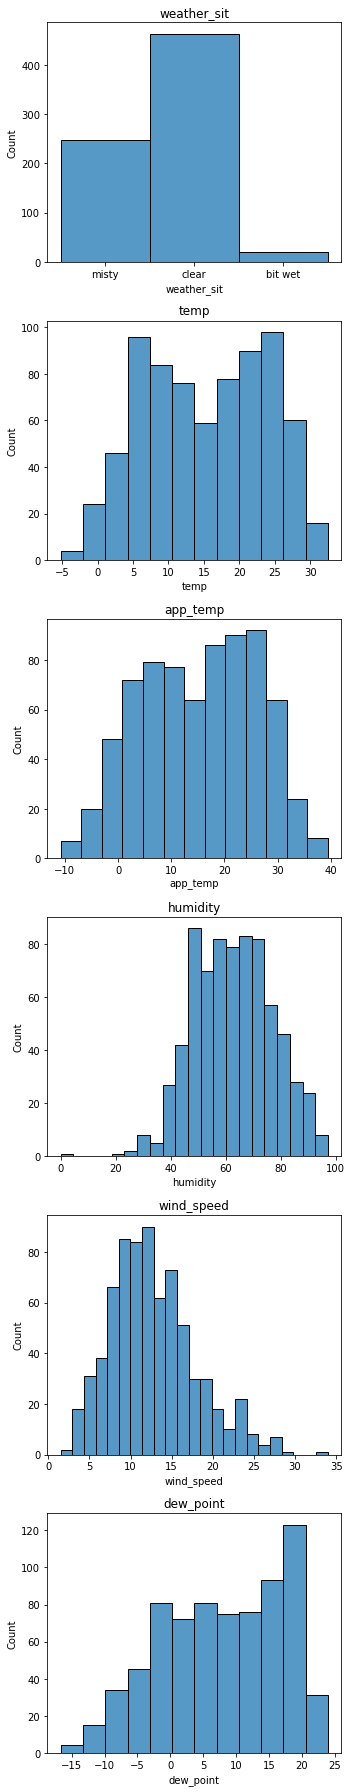

In [204]:
# Plot histograms of weather-related features for df_daily

weather_features = ['weather_sit', 'temp', 'app_temp', 'humidity', 'wind_speed', 'dew_point']

fig, axes = plt.subplots(len(weather_features),1, figsize = (5,25))
for i, feature in enumerate (weather_features):
    sns.histplot(ax = axes [i], data = df_daily, x = feature)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

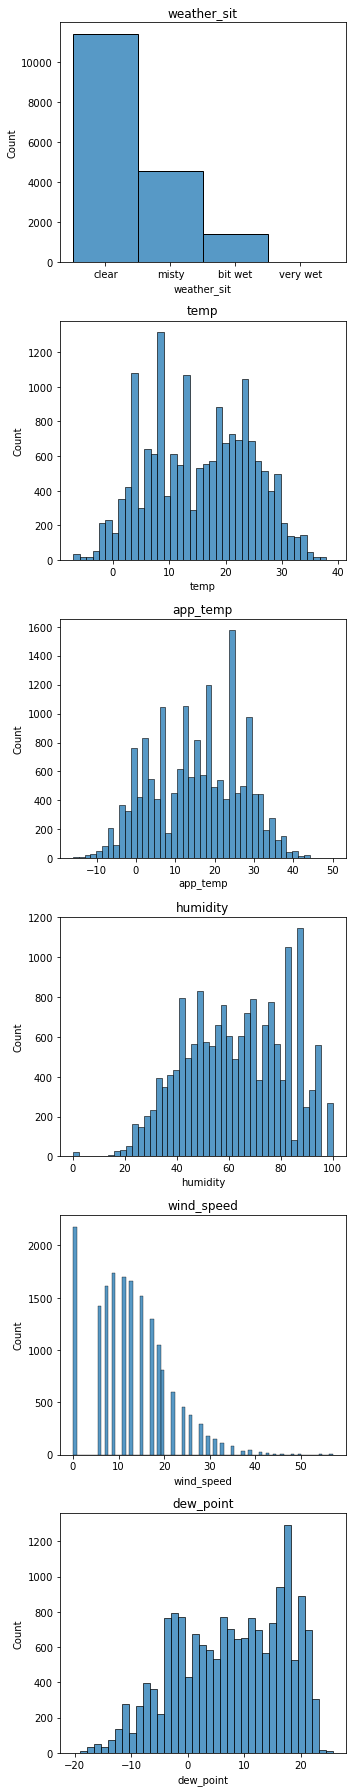

In [205]:
# Plot histograms of weather-related features for df_hourly

weather_features = ['weather_sit', 'temp', 'app_temp', 'humidity', 'wind_speed', 'dew_point']

fig, axes = plt.subplots(len(weather_features),1, figsize = (5,25))
for i, feature in enumerate (weather_features):
    sns.histplot(ax = axes [i], data = df_hourly, x = feature)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

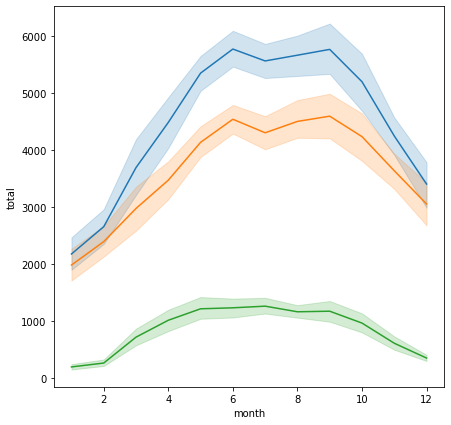

In [206]:
plt.figure(figsize = (7,7))
sns.lineplot(x = 'month', y = 'total', data = df_daily)
sns.lineplot(x = 'month', y = 'registered', data = df_daily)
sns.lineplot(x = 'month', y = 'casual', data = df_daily)

plt.show()

# Can't figure out how to label each curve in seaborn.
# Do it with matplotlib


<h3> Casual vs Registered Users per Month </h3>

In [207]:
# mean no. users per month
users_per_month = df_daily.groupby('month').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round().reindex(list(range(1,13)))

In [208]:
users_per_month

,casual,registered,total
month,,,
1,194.0,1982.0,2176.0
2,263.0,2393.0,2655.0
3,717.0,2975.0,3692.0
4,1013.0,3472.0,4485.0
5,1214.0,4136.0,5350.0
6,1232.0,4541.0,5772.0
7,1261.0,4303.0,5564.0
8,1162.0,4502.0,5664.0
9,1172.0,4594.0,5767.0


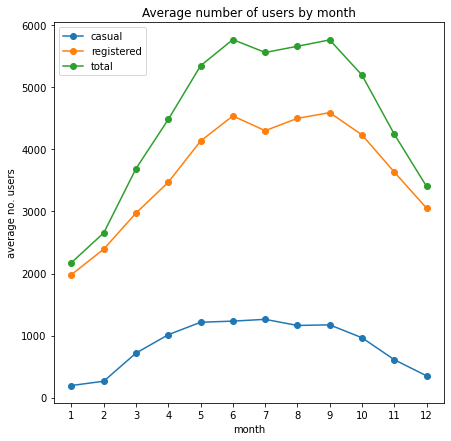

In [209]:
plt.figure(figsize = (7,7))
plt.title('Average number of users by month')
plt.plot(users_per_month.index, users_per_month['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_month.index, users_per_month['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_month.index, users_per_month['total'], label = 'total', marker = 'o')
plt.xticks(ticks = users_per_month.index)
plt.xlabel ('month')
plt.ylabel ('average no. users')
plt.legend()
plt.show()

Note that this is for both years (2011 & 2012)

<h3> Casual vs Registered Users per Day of Week </h3>

In [210]:
# users per day of week
users_per_DoW = df_daily.groupby('day_of_week').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round()
users_per_DoW = users_per_DoW.reindex(['mon', 'tue', 'wed','thu', 'fri', 'sat', 'sun'])

In [211]:
users_per_DoW

,casual,registered,total
day_of_week,,,
mon,674.0,3664.0,4338.0
tue,556.0,3954.0,4511.0
wed,551.0,3997.0,4549.0
thu,591.0,4076.0,4667.0
fri,752.0,3938.0,4690.0
sat,1465.0,3085.0,4551.0
sun,1338.0,2891.0,4229.0


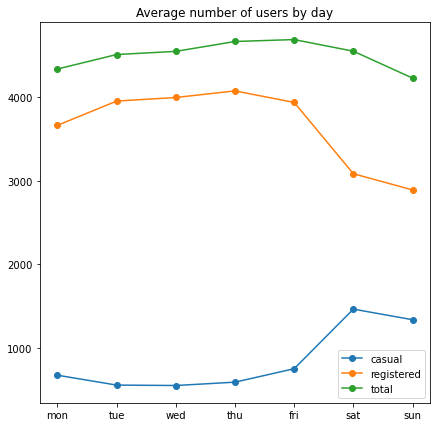

In [212]:
plt.figure(figsize = (7,7))
plt.title('Average number of users by day')
plt.plot(users_per_DoW.index, users_per_DoW['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['total'], label = 'total', marker = 'o')
plt.legend()
plt.show()

This is interesting. At the weekend, the number of casual users goes up and the number of registered users goes down.

<h3> Average Total Users per Day of Week, Sorted by Season </h3>

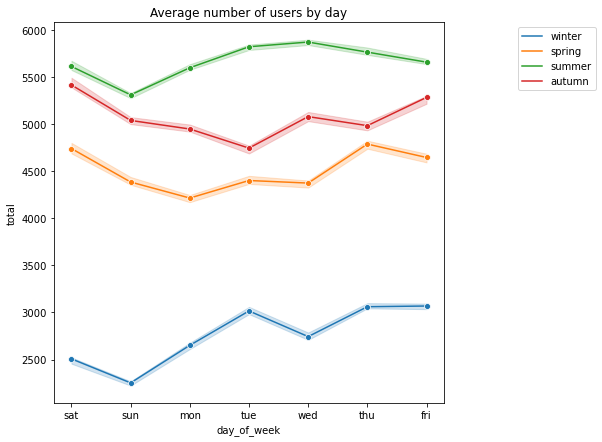

In [326]:
plt.figure(figsize = (7,7))
lp = sns.lineplot(x = 'day_of_week', y = 'total', data = df_daily, hue = 'season', err_style = 'band', ci = 10, marker = 'o')
lp.legend(loc = 'upper right', bbox_to_anchor = (1.4,1))
plt.title('Average number of users by day')
plt.show()

<h3> Average Total Users per Hour, Sorted by Season </h3>

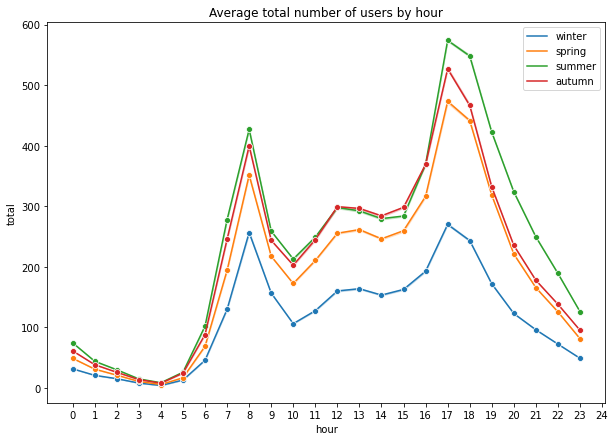

In [327]:
plt.figure(figsize = (10,7))
lp = sns.lineplot(x = 'hour', y = 'total', data = df_hourly, hue = 'season', err_style = 'band', ci = 10, marker = 'o')
lp.legend(loc = 'upper right', bbox_to_anchor = (1,1))
plt.title('Average total number of users by hour')
plt.xticks (ticks = range(0,25))
plt.show()

Spring and summer figures are v. similar. <br>
Evening peak lasts longer in summer (since evenings are longer / temps are higher) <br>
Number of users significantly lower in winter, but not by as much as I would've thought.

<h3> Casual vs Registered Users per Hour, Sorted by Season </h3>

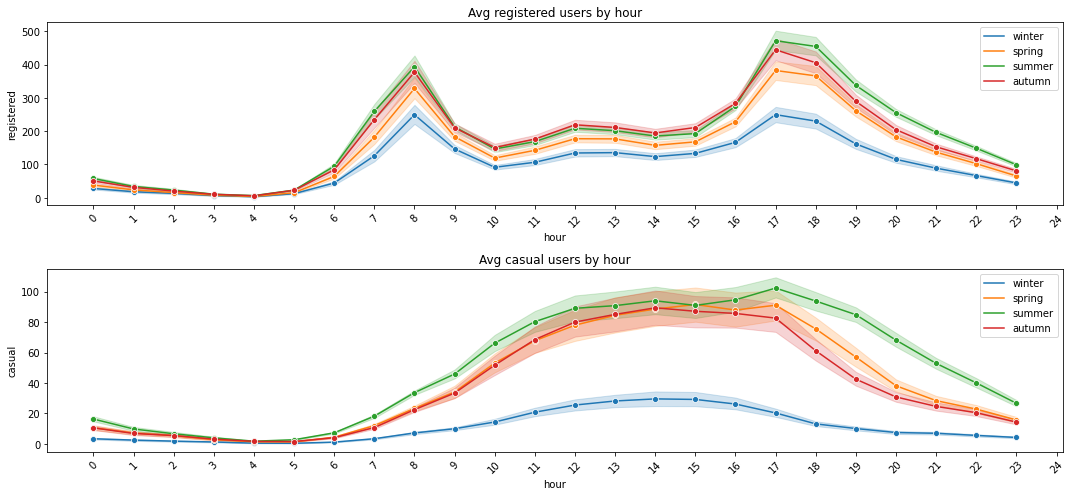

In [215]:


fig, axes = plt.subplots(2,1, figsize = (15, 7), sharey = False)
sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'season', marker = 'o', ci = 95)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'season', marker = 'o', ci = 95)
#sns.lineplot(ax = axes[2], x = 'hour', y = 'total', data = df_hourly, hue = 'season', marker = 'o', ci = 10)


axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))
#axes[2].legend(loc = 'upper right', bbox_to_anchor = (1,1))

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))
#axes[2].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)
#axes[2].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')
#axes [2].set_title('Avg total users by hour')

plt.tight_layout()
plt.show()

In winter, the drop in users is less severe for registered users than for casual users. <br>
For casual users, the number of users is quite consistent in spring, summer, autumn. 

<h3> Casual vs Registered Users per Hour, Sorted by apparent temperature category </h3>

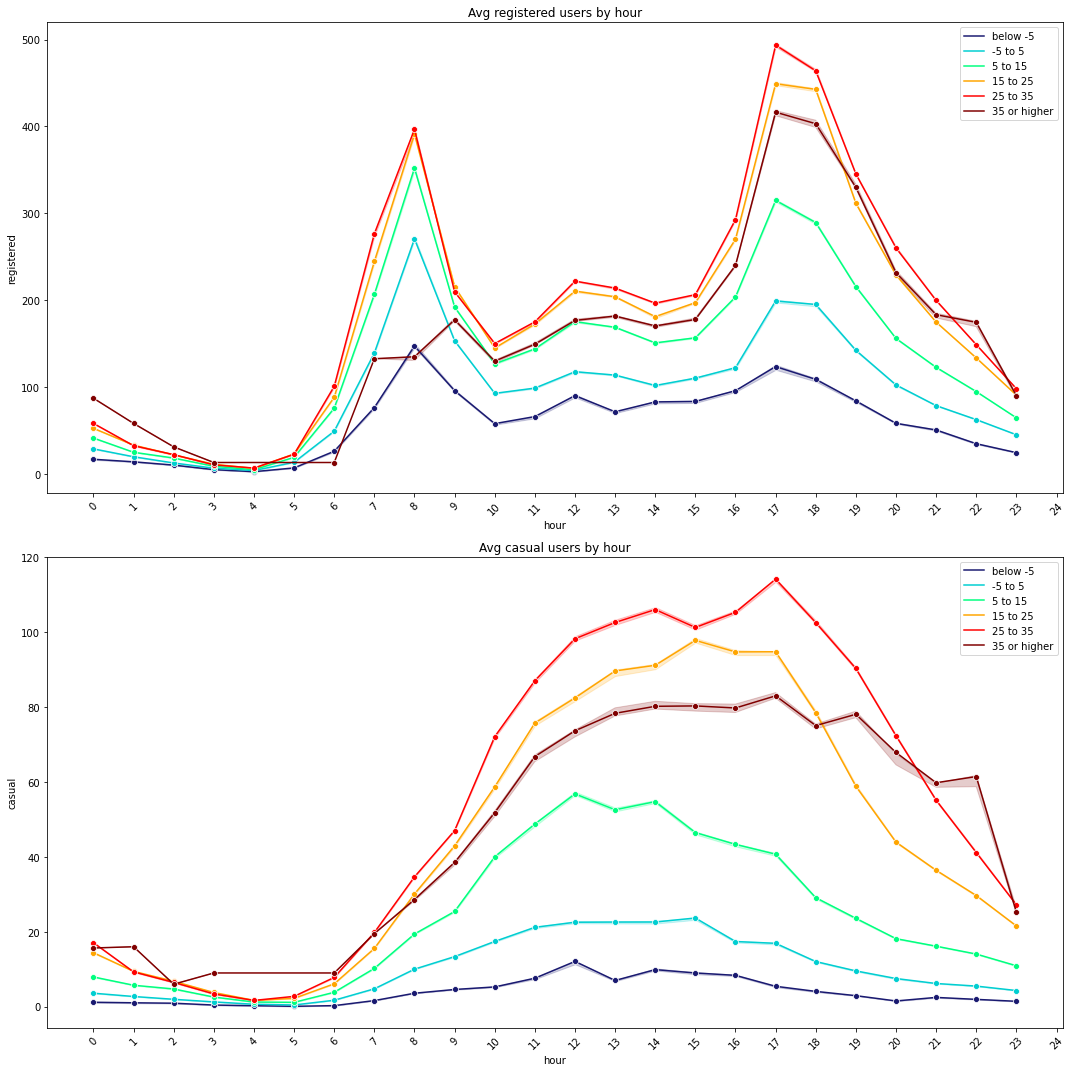

In [216]:


fig, axes = plt.subplots(2,1, figsize = (15, 15), sharey = False)

palette = {'below -5': "#191970", '-5 to 5': "#00CED1", '5 to 15': "#00FF7F",
           '15 to 25': "#FFA500", '25 to 35': "#FF0000", '35 or higher': "#800000"}

hue_order = ['below -5', '-5 to 5', '5 to 15', '15 to 25', '25 to 35', '35 or higher']

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)
#sns.lineplot(ax = axes[2], x = 'hour', y = 'total', data = df_hourly, hue = 'season', marker = 'o', ci = 10)


axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))
#axes[2].legend(loc = 'upper right', bbox_to_anchor = (1,1))

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))
#axes[2].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)
#axes[2].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')
#axes [2].set_title('Avg total users by hour')

plt.tight_layout()
plt.show()

Interesting. <br>
Among registered users, when app_temp is 35 or above, way fewer people use the bikes TO work, but a lot still bike FROM work. <br>
They don't want to get sweaty when they arrive at work. <br>
But for (5 to 15), a large number of people bike TO work, but way fewer bike FROM work.

<h3> Total Users per Hour, Sorted by Free Day vs Work Day </h3>

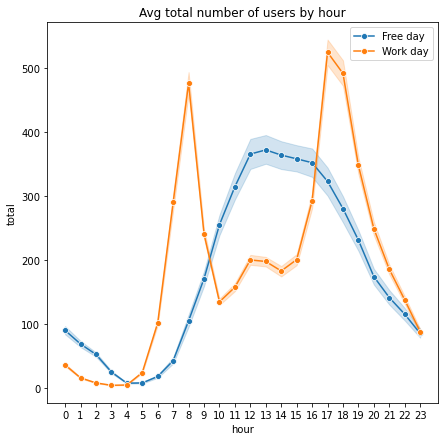

In [217]:
plt.figure(figsize = (7,7))
plt.title('Avg total number of users by hour')
lp = sns.lineplot(x = 'hour', y = 'total', hue = 'work_day', data = df_hourly, marker = 'o')
lp.legend(loc = 'upper right', bbox_to_anchor = (1,1))
lp.set_xticks(range(0,24))
lp.legend(labels = ['Free day', 'Work day'])
plt.show()

Interesting. When it's a work day, usage peaks at around 8 AM. When it's not a work day, usage peaks at around noon. <br>
Of course, we know there are way more registered users, so this graph is likely influenced mostly by registered users.

<h3> Registered vs Casual Users, Sorted by Work Day vs Free Day </h3>

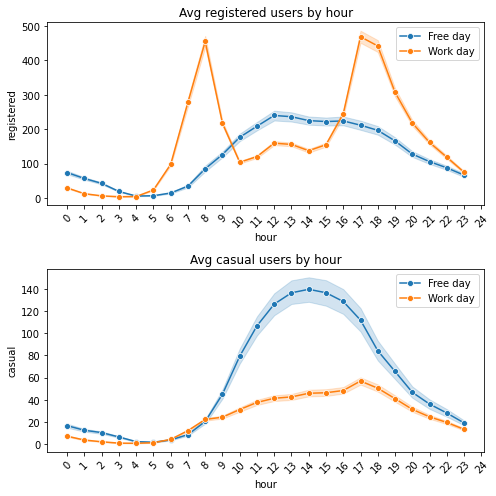

In [218]:
fig, axes = plt.subplots(2, 1, figsize = (7,7))

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'work_day', marker = 'o', ci = 95)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'work_day', marker = 'o', ci = 95)
#sns.lineplot(ax = axes[2], x = 'hour', y = 'total', data = df_hourly, hue = 'season', marker = 'o', ci = 10)


axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])
#axes[2].legend(loc = 'upper right', bbox_to_anchor = (1,1))

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))
#axes[2].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)
#axes[2].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')
#axes [2].set_title('Avg total users by hour')



plt.tight_layout()
plt.show()


plt.show()

Registered users: <br>
Work days: sharper peaks during commuting times <br>
Free days: gentler, wider peak (from late morning to late afternoon) <br>

Casual users: <br>
Work day: lower peak at around 5 pm <br>
Free day: higher peak in the early afternoon <br>

<h3> Total number of users per hour, sorted by temperature </h3>

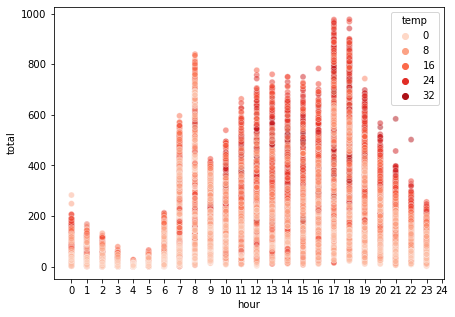

In [219]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'hour', y = 'total', data = df_hourly, hue = 'temp', palette = 'Reds', alpha = 0.5)
plt.xticks(ticks = range(0,25), labels = range(0,25))

plt.show()

<h3> Registered vs Casual Users by Hour, sorted by temperature </h3>

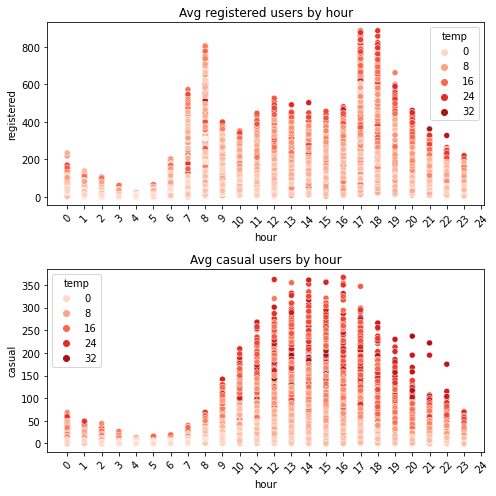

In [220]:
fig, axes = plt.subplots(2, 1, figsize = (7,7))

sns.scatterplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'temp', marker = 'o', palette = 'Reds')
sns.scatterplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'temp', marker = 'o', palette = 'Reds')


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)


axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()


plt.show()

Casual users are more temperature dependent. <br>
Intuitive, since casual users will decide to rent on a spontaneous basis – when the weawther is nice.

<h3> Total number of users by hour, sorted by wewather situation </h3>

<AxesSubplot:xlabel='hour', ylabel='total'>

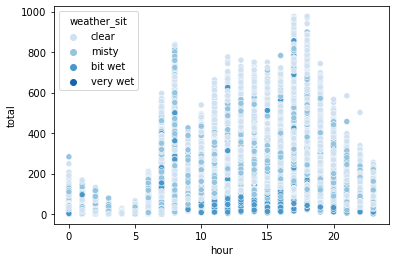

In [221]:
sns.scatterplot(x = 'hour', y = 'total', data = df_hourly, hue = 'weather_sit', palette = 'Blues')

Intuitive. Fewer users in bad weather. <br>
Though at around the 8 AM mark, there are still some users even in wet weather. <br> 
I suspect these are mostly registered users who need to commute. 

<h3> Registered vs Casual Users by Hour, sorted by weather situation </h3>

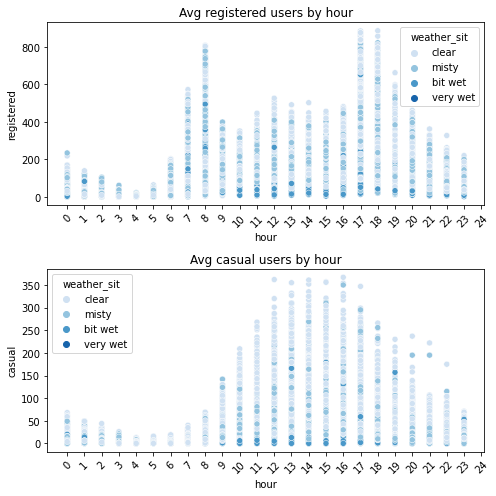

In [222]:
fig, axes = plt.subplots(2, 1, figsize = (7,7))

sns.scatterplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'weather_sit', marker = 'o', palette = 'Blues')
sns.scatterplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'weather_sit', marker = 'o', palette = 'Blues')


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)


axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()


plt.show()

<h3> Time series data – monthly total </h3>

In [223]:
df_monthly = df_daily.groupby('year_month').sum()[['casual', 'registered', 'total']]

In [224]:
df_monthly

,casual,registered,total
year_month,,,
2011-01,3073,35116,38189
2011-02,6242,41973,48215
2011-03,12826,51219,64045
2011-04,22346,72524,94870
2011-05,31050,104771,135821
2011-06,30612,112900,143512
2011-07,36452,104889,141341
2011-08,28842,107849,136691
2011-09,26545,100873,127418


In [225]:
df_monthly.index

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'],
      dtype='object', name='year_month')

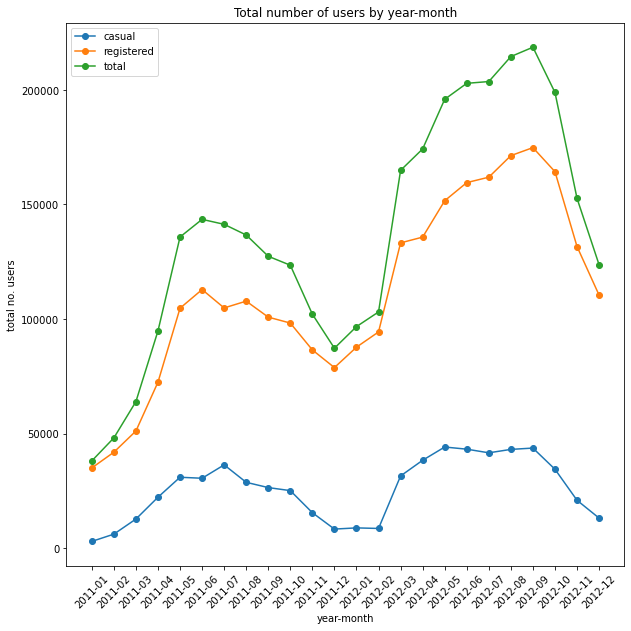

In [226]:
plt.figure(figsize = (10,10))

plt.title('Total number of users by year-month')

plt.plot(df_monthly.index, df_monthly['casual'], label = 'casual', marker = 'o')
plt.plot(df_monthly.index, df_monthly['registered'], label = 'registered', marker = 'o')
plt.plot(df_monthly.index, df_monthly['total'], label = 'total', marker = 'o')
plt.xticks(ticks = df_monthly.index, rotation = 45)
plt.xlabel ('year-month')
plt.ylabel ('total no. users')
plt.legend()
plt.show()



If we could get the same data for all the subsequent years and create the plot above, we would be able to see both seasonality and trend.

We see growth in registered users, but not in casual users. <br>

Would be good to know: <br>
Of the new registered users, how many of them were previously casual users? <br>
Do people go from being non-users to registered users? Or do most new registered users come from being casual users first?

Do monthly plots by year, then stacked above each other: <br>
Like in section 4 here: <br>

https://www.machinelearningplus.com/time-series/time-series-analysis-python/   <br>

Also try and get the same data from the following years too



<h3> Seasonal Plots </h3>

In [227]:
df_monthly_mean = df_daily.groupby('year_month').mean()[['casual', 'registered', 'total']].round()

In [228]:
df_monthly_mean = df_monthly_mean.rename(columns = {'casual': 'casual_mean', 
                                                    'registered': 'registered_mean',
                                                    'total':'total_mean'})

In [229]:
df_monthly_mean.head()


,casual_mean,registered_mean,total_mean
year_month,,,
2011-01,99.0,1133.0,1232.0
2011-02,223.0,1499.0,1722.0
2011-03,414.0,1652.0,2066.0
2011-04,745.0,2417.0,3162.0
2011-05,1002.0,3380.0,4381.0


In [230]:
df_monthly_mean['year_month'] = df_monthly_mean.index
df_monthly_mean['year_month'] = pd.to_datetime(df_monthly_mean['year_month'])
df_monthly_mean['year'] = df_monthly_mean['year_month'].dt.year
df_monthly_mean['month'] = df_monthly_mean['year_month'].dt.strftime('%b')

In [231]:
df_monthly_mean.head()

,casual_mean,registered_mean,total_mean,year_month,year,month
year_month,,,,,,
2011-01,99.0,1133.0,1232.0,2011-01-01,2011,Jan
2011-02,223.0,1499.0,1722.0,2011-02-01,2011,Feb
2011-03,414.0,1652.0,2066.0,2011-03-01,2011,Mar
2011-04,745.0,2417.0,3162.0,2011-04-01,2011,Apr
2011-05,1002.0,3380.0,4381.0,2011-05-01,2011,May


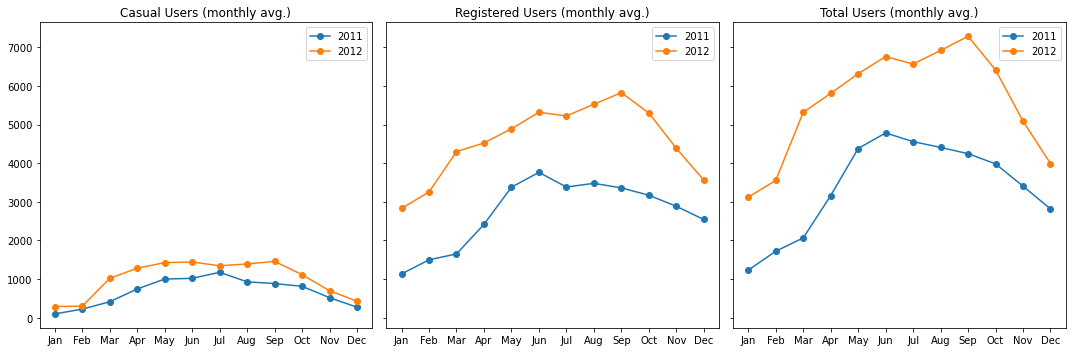

In [232]:
# Draw Plot
fig, ax = plt.subplots(1,3, figsize = (15, 5), sharey = True)

ax [0].plot('month', 'casual_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2011], label = '2011', marker = 'o')
ax [0].plot('month', 'casual_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2012], label = '2012', marker = 'o')
ax[0].legend()
ax[0].set_title('Casual Users (monthly avg.)')

ax [1].plot('month', 'registered_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2011], label = '2011' , marker = 'o')
ax [1].plot('month', 'registered_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2012], label = '2012' , marker = 'o')
ax[1].legend()
ax[1].set_title('Registered Users (monthly avg.)')

ax [2].plot('month', 'total_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2011], label = '2011' , marker = 'o')
ax [2].plot('month', 'total_mean', data = df_monthly_mean[df_monthly_mean['year'] == 2012], label = '2012' , marker = 'o')
ax[2].legend()
ax[2].set_title('Total Users (monthly avg.)')

plt.tight_layout()
plt.show()



Significant year-on-year growth in registered users. <br>
Very modest growth in casual users. <br>
Interesting to note: for registered users, the peak changes in 2012 to September.

Can do what Tanusree did with box plots. <br>
Do daily plots for week 1. <br>
And then concatenate weeks 1 – 52. <br>
This will tell you trend with respect to week. And seasonality with respect to day. <br>

Key insight is that the TREND is always going to be one level of abstraction than the SEASONALITY. <br>
If the graph shows you an upwards trend on a * weekly * basis, then the seasonality would show you on which * days * there are peaks and troughs. 

<h3> Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution </h3>

These plots won't be AS informative since we only have data for two years. <br> 
But create the plots for the limited data set and then repeat once you include the data for all the subsequent years. <br>

In [233]:
df_monthly_mean.head()

,casual_mean,registered_mean,total_mean,year_month,year,month
year_month,,,,,,
2011-01,99.0,1133.0,1232.0,2011-01-01,2011,Jan
2011-02,223.0,1499.0,1722.0,2011-02-01,2011,Feb
2011-03,414.0,1652.0,2066.0,2011-03-01,2011,Mar
2011-04,745.0,2417.0,3162.0,2011-04-01,2011,Apr
2011-05,1002.0,3380.0,4381.0,2011-05-01,2011,May


<AxesSubplot:xlabel='month', ylabel='total_mean'>

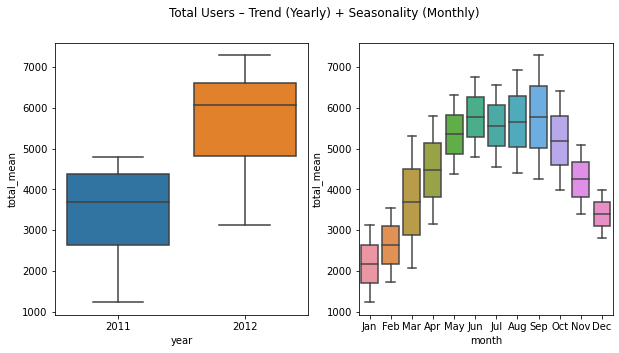

In [254]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Total Users – Trend (Yearly) + Seasonality (Monthly)')
sns.boxplot(ax = axes[0],x = 'year', y = 'total_mean', data = df_monthly_mean )
sns.boxplot(ax = axes[1],x = 'month', y = 'total_mean', data = df_monthly_mean )

In [235]:
df_daily.head()

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52
2,2,2011-01-03,winter,2011,1,no,mon,yes,clear,1.2,-3.5,43.7,16.6,120,1229,1349,-9.780283,-5 to 5,2011-01,1
3,3,2011-01-04,winter,2011,1,no,tue,yes,clear,1.4,-2.0,59.0,10.7,108,1454,1562,-5.728918,-5 to 5,2011-01,1
4,4,2011-01-05,winter,2011,1,no,wed,yes,clear,2.7,-0.9,43.7,12.5,82,1518,1600,-8.415394,-5 to 5,2011-01,1


<AxesSubplot:xlabel='hour', ylabel='registered'>

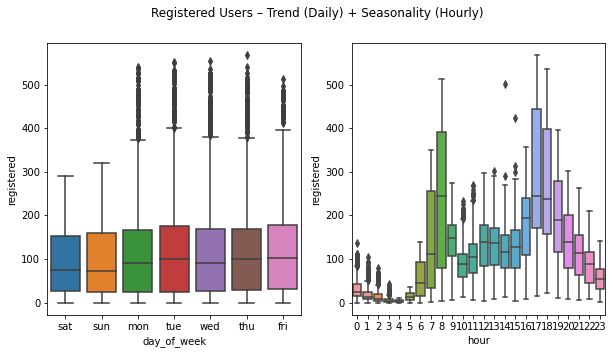

In [236]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Registered Users – Trend (Daily) + Seasonality (Hourly)')
sns.boxplot(ax = axes[0],x = 'day_of_week', y = 'registered', data = df_hourly[df_hourly['year'] == 2011])
sns.boxplot(ax = axes[1],x = 'hour', y = 'registered', data = df_hourly[df_hourly['year'] == 2011])

<AxesSubplot:xlabel='hour', ylabel='casual'>

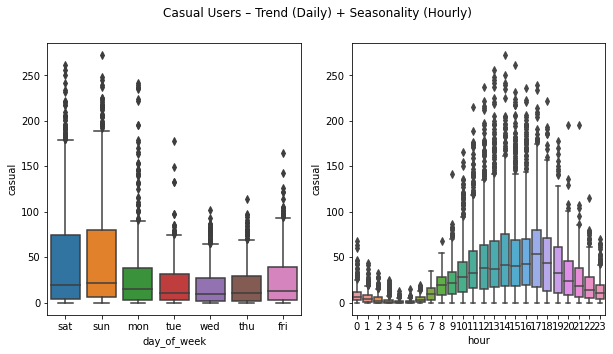

In [237]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Casual Users – Trend (Daily) + Seasonality (Hourly)')
sns.boxplot(ax = axes[0],x = 'day_of_week', y = 'casual', data = df_hourly[df_hourly['year'] == 2011])
sns.boxplot(ax = axes[1],x = 'hour', y = 'casual', data = df_hourly[df_hourly['year'] == 2011])

<h3> Import dataframe with data for all years </h3>

In [238]:
df_all_agg_daily = pd.read_csv('cleaned_data/df_all_agg_daily.csv')
df_all_agg_hourly = pd.read_csv('cleaned_data/df_all_agg_hourly.csv')

In [239]:
df_all_agg_daily.head()
df_all_agg_hourly.head()

,date,hour,registered,casual,year,month,day,year_month
0,2010-09-20,11,2.0,0.0,2010,9,Mon,2010-09
1,2010-09-20,12,17.0,0.0,2010,9,Mon,2010-09
2,2010-09-20,13,11.0,0.0,2010,9,Mon,2010-09
3,2010-09-20,14,4.0,2.0,2010,9,Mon,2010-09
4,2010-09-20,15,10.0,2.0,2010,9,Mon,2010-09


In [240]:
df_all_agg_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2656 non-null   object
 1   registered  2656 non-null   int64 
 2   casual      2656 non-null   int64 
 3   year        2656 non-null   int64 
 4   month       2656 non-null   int64 
 5   day         2656 non-null   object
 6   year_month  2656 non-null   object
dtypes: int64(4), object(3)
memory usage: 145.4+ KB


In [241]:
df_all_agg_daily['date'] = pd.to_datetime(df_all_agg_daily['date'])
df_all_agg_hourly['date'] = pd.to_datetime(df_all_agg_hourly['date'])

In [242]:
df_all_agg_daily.info()
df_all_agg_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2656 non-null   datetime64[ns]
 1   registered  2656 non-null   int64         
 2   casual      2656 non-null   int64         
 3   year        2656 non-null   int64         
 4   month       2656 non-null   int64         
 5   day         2656 non-null   object        
 6   year_month  2656 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 145.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63240 entries, 0 to 63239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        63240 non-null  datetime64[ns]
 1   hour        63240 non-null  int64         
 2   registered  63240 non-null  float64       
 3   casual      63240 non-null  float64   

In [243]:
df_all_agg_daily.head()

,date,registered,casual,year,month,day,year_month
0,2010-09-20,178,34,2010,9,Mon,2010-09
1,2010-09-21,215,109,2010,9,Tue,2010-09
2,2010-09-22,260,117,2010,9,Wed,2010-09
3,2010-09-23,249,124,2010,9,Thu,2010-09
4,2010-09-24,206,156,2010,9,Fri,2010-09


In [244]:
df_all_agg_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2656 non-null   datetime64[ns]
 1   registered  2656 non-null   int64         
 2   casual      2656 non-null   int64         
 3   year        2656 non-null   int64         
 4   month       2656 non-null   int64         
 5   day         2656 non-null   object        
 6   year_month  2656 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 145.4+ KB


In [245]:
df_all_monthly_mean = df_all_agg_daily [['date', 'registered', 'casual']].resample('M', on = 'date').mean()
df_all_monthly_mean.head(5)

,registered,casual
date,,
2010-09-30,245.818182,118.000000
2010-10-31,806.193548,353.548387
2010-11-30,1275.666667,303.900000
2010-12-31,826.451613,84.709677
2011-01-31,1110.903226,98.870968


In [338]:
df_all_rolling_365 = df_all_agg_daily [['date', 'registered', 'casual']].rolling(window = 365, on = 'date', center = True, min_periods = 365).mean()

In [339]:
df_all_rolling_365.head(200)

,date,casual,registered
0,2010-09-20,NaN,NaN
1,2010-09-21,NaN,NaN
2,2010-09-22,NaN,NaN
3,2010-09-23,NaN,NaN
4,2010-09-24,NaN,NaN
...,...,...,...
195,2011-04-03,605.375342,2224.306849
196,2011-04-04,605.671233,2232.295890
197,2011-04-05,606.841096,2242.301370
198,2011-04-06,608.136986,2252.367123


In [340]:
df_all_rolling_365.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2656 non-null   datetime64[ns]
 1   casual      2292 non-null   float64       
 2   registered  2292 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 62.4 KB


<h3> Number of users over time </h3>

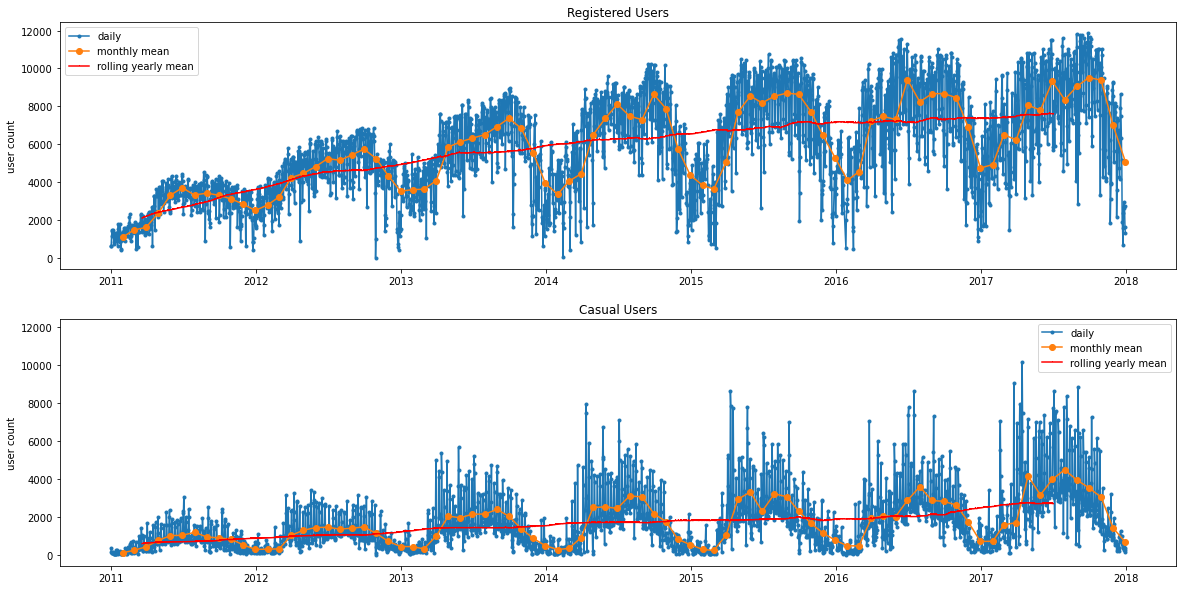

In [346]:
# Start and end of the date range to extract
start, end = '2011-01', '2017-12'


fig, ax = plt.subplots(2,1, figsize = (20,10), sharey = True)
ax[0].plot(df_all_agg_daily.set_index('date').loc[start:end, 'registered'], marker = '.', linestyle = '-', label = 'daily')
ax[0].plot(df_all_monthly_mean.loc[start:end, 'registered'], marker = 'o', linestyle = '-', label = 'monthly mean')
ax[0].plot(df_all_rolling_365.set_index('date').loc[start:end, 'registered'], marker = ',', linestyle = '-', label = 'rolling yearly mean', c = 'r')

ax[0].set_title('Registered Users')
ax[0].set_ylabel('user count')
ax[0].legend()



ax[1].plot(df_all_agg_daily.set_index('date').loc[start:end, 'casual'], marker = '.', linestyle = '-', label = 'daily')
ax[1].plot(df_all_monthly_mean.loc[start:end, 'casual'], marker = 'o', linestyle = '-', label = 'monthly mean')
ax[1].plot(df_all_rolling_365.set_index('date').loc[start:end, 'casual'], marker = ',', linestyle = '-', label = 'rolling yearly mean', c = 'r')

ax[1].set_title('Casual Users')
ax[1].set_ylabel('user count')
ax[1].legend()



plt.show()



In [247]:
df_all_agg_daily.head()

,date,registered,casual,year,month,day,year_month
0,2010-09-20,178,34,2010,9,Mon,2010-09
1,2010-09-21,215,109,2010,9,Tue,2010-09
2,2010-09-22,260,117,2010,9,Wed,2010-09
3,2010-09-23,249,124,2010,9,Thu,2010-09
4,2010-09-24,206,156,2010,9,Fri,2010-09


In [260]:
df_all_monthly = df_all_agg_daily.groupby('year_month').mean()
df_all_monthly[['year','month']] = df_all_monthly[['year','month']].astype('int')


In [261]:
df_all_monthly

,registered,casual,year,month
year_month,,,,
2010-09,245.818182,118.000000,2010,9
2010-10,806.193548,353.548387,2010,10
2010-11,1275.666667,303.900000,2010,11
2010-12,826.451613,84.709677,2010,12
2011-01,1110.903226,98.870968,2011,1
...,...,...,...,...
2017-08,9054.419355,3930.548387,2017,8
2017-09,9519.633333,3526.066667,2017,9
2017-10,9385.612903,3028.354839,2017,10


Text(0.5, 1.0, 'Casual users by month')

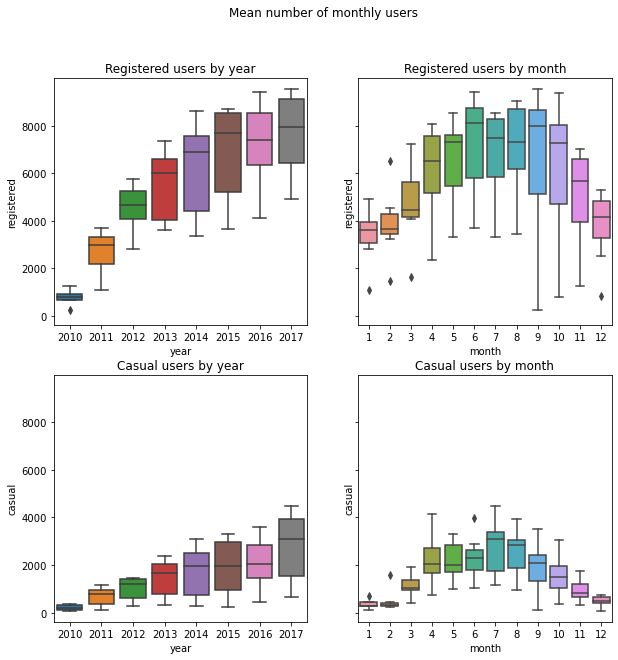

In [269]:
fig, axes = plt.subplots(2,2, figsize = (10,10), sharey = True)
fig.suptitle('Mean number of monthly users')
sns.boxplot(ax = axes[0,0],x = 'year', y = 'registered', data = df_all_monthly)
axes[0,0].set_title('Registered users by year')
sns.boxplot(ax = axes[0,1],x = 'month', y = 'registered', data = df_all_monthly)
axes[0,1].set_title('Registered users by month')
sns.boxplot(ax = axes[1,0],x = 'year', y = 'casual', data = df_all_monthly )
axes[1,0].set_title('Casual users by year')
sns.boxplot(ax = axes[1,1],x = 'month', y = 'casual', data = df_all_monthly)
axes[1,1].set_title('Casual users by month')

In [283]:
df_all_monthly = df_all_monthly.reset_index()

In [286]:
df_all_monthly['year_month'] = pd.to_datetime(df_all_monthly['year_month'])

In [294]:
df_all_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  88 non-null     datetime64[ns]
 1   registered  88 non-null     float64       
 2   casual      88 non-null     float64       
 3   year        88 non-null     int64         
 4   month       88 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 3.6 KB


In [302]:
type (df_all_monthly['registered'])

pandas.core.series.Series

In [314]:
# Multiplicative Decomposition
registered_mul = seasonal_decompose(df_all_monthly['registered'], model = 'multiplicative', period = 12)
registered_add = seasonal_decompose(df_all_monthly['registered'], model = 'additive', period = 12)


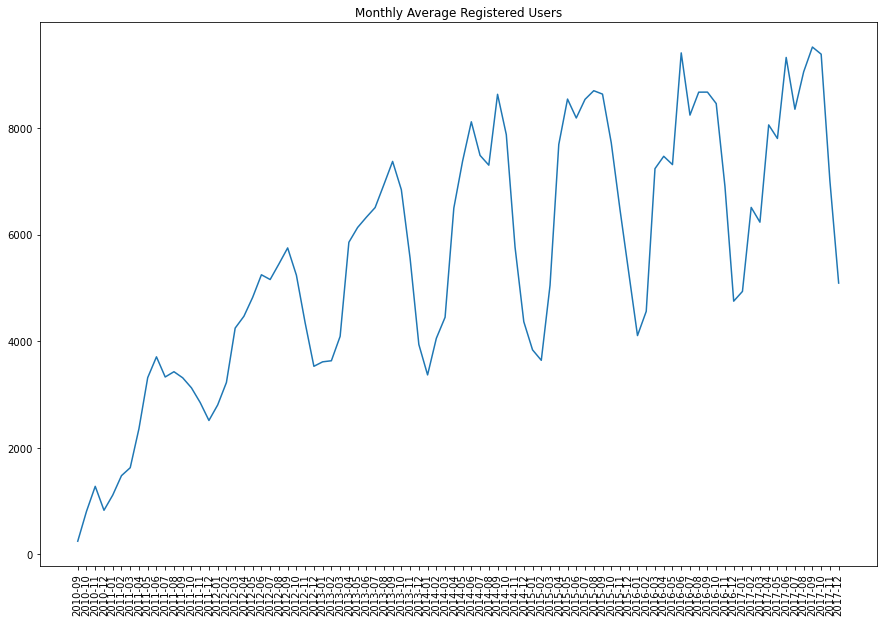

In [278]:
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(df_all_monthly.index, df_all_monthly['registered'])
plt.xticks(rotation = 90)
plt.title('Monthly Average Registered Users')
plt.show()

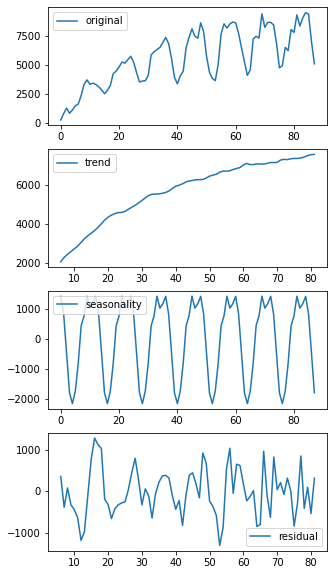

In [325]:
fig, ax = plt.subplots(4,1, figsize = (5,10))

ax[0].plot(df_all_monthly['registered'], label = 'original')
ax[0].legend(loc='upper left')
ax[1].plot(registered_add.trend, label = 'trend')
ax[1].legend(loc='upper left')
ax[2].plot(registered_add.seasonal, label = 'seasonality')
ax[2].legend(loc='upper left')
ax[3].plot(registered_add.resid, label = 'residual')
ax[3].legend(loc='upper left')

plt.legend()
plt.show()

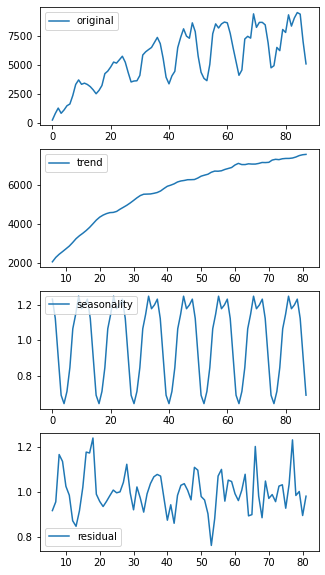

In [324]:
fig, ax = plt.subplots(4,1, figsize = (5,10))

ax[0].plot(df_all_monthly['registered'], label = 'original')
ax[0].legend(loc='upper left')
ax[1].plot(registered_mul.trend, label = 'trend')
ax[1].legend(loc='upper left')
ax[2].plot(registered_mul.seasonal, label = 'seasonality')
ax[2].legend(loc='upper left')
ax[3].plot(registered_mul.resid, label = 'residual')
ax[3].legend(loc='upper left')

plt.legend()
plt.show()

OK now we want to look at the full data set that includes all the info (including start / end stations, duration, bike number, etc.)

In [348]:
df_all_years = pd.read_csv('cleaned_data/df_all_years.csv')

In [349]:
df_all_years.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:00:00,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:00:00,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:00:00,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:00:00,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:00:00,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [355]:
df_all_years['Start date'] = pd.to_datetime(df_all_years['Start date'])
df_all_years['End date'] = pd.to_datetime(df_all_years['End date'])

In [352]:
df_all_years['Bike number'].unique().shape

(2971,)

Almost 3000 bikes in the years 2011 to 2013

In [357]:
# Count number of bikes by year

num_bikes_2011 = df_all_years[df_all_years['Start date'].dt.year == 2011]['Bike number'].unique().shape[0]
num_bikes_2012 = df_all_years[df_all_years['Start date'].dt.year == 2012]['Bike number'].unique().shape[0]
num_bikes_2013 = df_all_years[df_all_years['Start date'].dt.year == 2013]['Bike number'].unique().shape[0]

num_bikes_2011, num_bikes_2012, num_bikes_2013


(1325, 1749, 2920)

Interesting. Number of bikes doubled over two years.

In [359]:
bikes_2011 = df_all_years[df_all_years['Start date'].dt.year == 2011]['Bike number'].unique()
bikes_2012 = df_all_years[df_all_years['Start date'].dt.year == 2012]['Bike number'].unique()
bikes_2013 = df_all_years[df_all_years['Start date'].dt.year == 2013]['Bike number'].unique()

In [360]:
len(bikes_2011), len(bikes_2012), len(bikes_2013)

(1325, 1749, 2920)

In [364]:
len (np.intersect1d(bikes_2011, bikes_2012)), len (np.intersect1d(bikes_2012, bikes_2013))

(1303, 1718)

Loss of bikes between 2011 and 2012: 22 <br>
Loss of bikes between 2012 and 2013: 31

The correct bike names start with 'W' or 'w'. <br>
Let's separate the bike names into 'correct' and 'corrupt'

In [375]:
N = int (len(bikes_2011) / 25)

bikes_correct = []
bikes_corrupt = []

for bike in bikes_2011:
    if bike[0] == 'W' or  bike[0] == 'w':
        bikes_correct.append(bike)
    else:
        bikes_corrupt.append(bike)

len (bikes_correct), len(bikes_corrupt)

(1309, 16)

In [ ]:
print(bikes_correct)

In [376]:
print(bikes_corrupt)

['?(0xFFFFFFFFAAC5A4C0)', '?(0x000000003EB026B9)', '?(0x000000007C120F6A)', '?(0xFFFFFFFF9A5FEA16)', '?(0xFFFFFFFFEBA95C18)', '?(0xFFFFFFFFEE8DADF1)', '?(0xFFFFFFFFFAF0B948)', '?(0x0000000026B3BBA8)', '?(0x000000002FD1067B)', '?(0x000000004752DD3A)', '?(0x000000005F128A5C)', '?(0xFFFFFFFFEB7B5641)', '?(0x000000006945F6DC)', '?(0xFFFFFFFF83DE3658)', '?(0xFFFFFFFFB44D36A5)', '?(0x000000004443704F)']


In [380]:
for bike in bikes_corrupt:
    print (df_all_years [df_all_years['Bike number'] == bike]['Duration'].count())

53
394
261
95
851
87
28
197
1421
148
9
826
14
185
34
198


Damn. The corrupt bike numbers all had lots of rides. <br>
I guess one thing you can do is just give the weird-looking bike numbers a new correct-looking number.